# Step 1: Install & import required Libaries

In [3]:
# Install SQLite3 (comes built in with python)
import sqlite3


import pandas as pd

# Install seaborn & matplotlib for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This method hides any warning in your Jupyter notebook
import warnings
warnings.filterwarnings('ignore')


# step 2: Create a new SQLite database and table

In [5]:
# Connect to SQLite database (creates a new file if it doesn't exist)
conn = sqlite3.connect("customer_data.db")

#create a cursor to interact with the database
cursor = conn.cursor()

#create a sample table
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER,
    city TEXT,
    total_spent REAL
)
""")


# step 3: Insert sample data into the SQL table

In [22]:
# Sample data  to insert
# Insert multiple records into the customers table

# Connect to the database (or create it)
import sqlite3

# Connect to a new database
conn = sqlite3.connect("customers.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS customers (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        age INTEGER,
        city TEXT,
        total_spent REAL
    )
""")

# Define the data
data = [
    ("Alice", 30, "KA", 250.75),
    ("Bob", 45, "AP", 150.00),
    ("Charlie", 28, "TN", 320.50),
    ("Emm", 32, "KL", 400.75)
]

# Insert data into the table
cursor.executemany("INSERT INTO customers (name, age, city, total_spent) VALUES (?, ?, ?, ?)", data)

# Commit and close
conn.commit()
conn.close()

conn.close()


# step 4: Run SQL queries Inside Jupyter Notebook

In [24]:
# Run a SQL query to retrieve all data
import sqlite3
import pandas as pd

# Create a new SQLite database in memory (just for testing)
conn = sqlite3.connect(':memory:')
conn.execute('CREATE TABLE customers (id INTEGER, name TEXT, city TEXT, age INTEGE)')
conn.execute('INSERT INTO customers VALUES (101, "Alice", "KA", 30), (102, "Bob", "AP", 45)')

df = pd.read_sql("SELECT * FROM customers", conn)
print(df)
conn.close()


    id   name city  age
0  101  Alice   KA   30
1  102    Bob   AP   45


# step 5 : Perform data analysis using SQL queries

In [26]:
import sqlite3
import pandas as pd

# Reconnect to the database
conn = sqlite3.connect("customers.db")

# Run your query
query = "SELECT * FROM customers WHERE total_spent > 500"
df = pd.read_sql(query, conn)

# Show results
print(df)

# Close the connection when you're done
conn.close()


Empty DataFrame
Columns: [id, name, age, city, total_spent]
Index: []


In [29]:
#find the average customer age

def run_query(query, db_path="customers.db"):
    with sqlite3.connect(db_path) as conn:
        return pd.read_sql(query, conn)

# Example use
df = run_query("SELECT AVG(age) AS average_age FROM customers")
print(df)


   average_age
0        33.75


In [31]:
def run_query(query, db_path="customers.db"):
    with sqlite3.connect(db_path) as conn:
        return pd.read_sql(query, conn)

# Example usage
df = run_query("SELECT city, COUNT(*) AS num_customers FROM customers GROUP BY city")
print(df)


  city  num_customers
0   AP              1
1   KA              1
2   KL              1
3   TN              1


# step 6: Visuaizing SQL query results using python

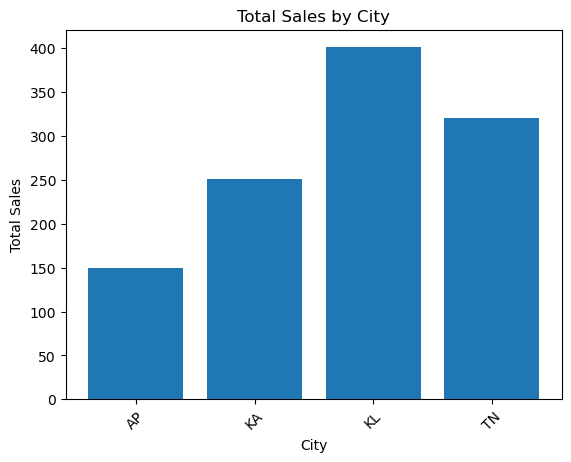

In [34]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

# Reconnect to the database
conn = sqlite3.connect("customers.db")

# Query the total sales by city
query = """
SELECT city, SUM(total_spent) AS total_sales
FROM customers
GROUP BY city
"""
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Plot the data
plt.bar(df['city'], df['total_sales'])
plt.title("Total Sales by City")  # Fixed title here
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


# Step 7 : close the SQL connection

In [ ]:
conn.close()